# 프로젝트명 : 4주차 제조데이터 실습코드

### 📌 프로젝트 소개

- 다이캐스팅은 액체화된 금속을 주조(틀, Frame)에 넣고 원하는 모양의 금속부품을 생산하는 방법입니다.
- 다이캐스팅에서는 주요 4대 요소인 압력, 속도, 시간, 온도에 대해서 조건관리를 중요 시 합니다.

### 📝 현장에서 온 정보
- 데이터 제공기업의 경우 일일 또는 주간 단위로 품질 이슈 현황을 파악하고 있으며 불량원인을 수작업으로 분석하고 있습니다.
- 각 불량에 대한 발생원인과 대책이 정의되어 있으나 이를 적용하여 해결하지 못하고 있는 실정입니다.
- 대부분의 중소기업에서는 관리자 및 작업자의 경험에 의해 설비를 운용하고 있어 체계적인 관리를 하지 못하고 있기 때문입니다.
- 따라서 일정한 공정 환경 및 공정 변수를 관리해 불량에 대응하는 것이 필요합니다.


#### 다이캐스팅

![다이캐스팅](https://firebasestorage.googleapis.com/v0/b/ls-storage-e452a.appspot.com/o/%E1%84%83%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%8F%E1%85%A2%E1%84%89%E1%85%B3%E1%84%90%E1%85%B5%E1%86%BC.gif?alt=media&token=70587460-34c3-4a67-a056-f7a5e6ad8521)

In [2]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import warnings
warnings.filterwarnings('ignore')

casting = pd.read_csv("https://firebasestorage.googleapis.com/v0/b/ls-storage-e452a.appspot.com/o/casting.csv?alt=media&token=54fffc33-03ad-4431-8e20-34ede32c043f", 
                      encoding='cp949',
                      index_col=0)

In [3]:
casting.head()

,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,facility_operation_cycleTime,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,119,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,100,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,99,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B


In [3]:
## Data EDA tool
import sweetviz as sv
## sweetviz를 이용해 데이터를 분석해보자
train_report = sv.analyze(casting, 
                          pairwise_analysis='on' #  on: 모든 변수간의 관계를 분석 
                                                 # off: 모든 변수간의 관계를 분석하지 않음
                          )
train_report.show_html('casting_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report casting_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
casting_data = casting

In [12]:
# Remove unnecessary columns
columns_to_drop = ['line', 'name', 'mold_name', 'time', 'date', 'registration_time', 'tryshot_signal']
casting_data_cleaned = casting_data.drop(columns=columns_to_drop)

# Handle missing values
# Drop columns with more than 50% missing values
threshold = 0.5
casting_data_cleaned = casting_data_cleaned.dropna(thresh=len(casting_data_cleaned) * threshold, axis=1)

# For remaining columns, fill missing values with median (for numerical columns)
numerical_cols = casting_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
casting_data_cleaned[numerical_cols] = casting_data_cleaned[numerical_cols].fillna(casting_data_cleaned[numerical_cols].median())

# Convert categorical columns to appropriate types and fill missing values
categorical_cols = casting_data_cleaned.select_dtypes(include=['object']).columns
casting_data_cleaned[categorical_cols] = casting_data_cleaned[categorical_cols].fillna('Unknown')

# Convert target variable 'passorfail' to integer
casting_data_cleaned['passorfail'] = casting_data_cleaned['passorfail'].astype(int)

In [13]:
casting_data_cleaned

,count,working,emergency_stop,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,가동,ON,731.0,119,120,110.0,112.0,75.0,331.0,...,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0,8722
1,243,가동,ON,720.0,98,125,109.0,109.0,67.0,309.0,...,1449.0,208.0,163.0,1449.0,481.0,0.0,30.0,25,0,8412
2,244,가동,ON,721.0,98,122,109.0,109.0,67.0,309.0,...,1449.0,208.0,163.0,1449.0,481.0,0.0,30.0,25,0,8412
3,245,가동,ON,721.0,100,125,112.0,109.0,67.0,308.0,...,1449.0,211.0,179.0,1449.0,483.0,0.0,30.0,25,0,8412
4,246,가동,ON,721.0,99,123,109.0,110.0,67.0,309.0,...,1449.0,216.0,187.0,1449.0,486.0,0.0,30.0,25,0,8412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,71,가동,ON,731.0,122,122,100.0,101.0,67.0,331.0,...,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0,8917
92011,72,가동,ON,731.0,120,121,100.0,101.0,67.0,331.0,...,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0,8917
92012,73,가동,ON,732.0,122,135,100.0,101.0,67.0,331.0,...,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0,8917
92013,74,가동,ON,732.0,133,122,100.0,101.0,67.0,331.0,...,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0,8917


In [16]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = casting_data_cleaned.drop(columns='passorfail')
y = casting_data_cleaned['passorfail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((73612, 22), (18403, 22), (73612,), (18403,))

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate model
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_classification_report = classification_report(y_test, y_pred_logistic)

logistic_accuracy, logistic_classification_report


(0.9836439710916698,
 '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     17609\n           1       0.97      0.64      0.77       794\n\n    accuracy                           0.98     18403\n   macro avg       0.98      0.82      0.88     18403\nweighted avg       0.98      0.98      0.98     18403\n')

In [22]:
# Correcting the encoding for existing columns only
categorical_cols = ['working', 'emergency_stop']

# Encode categorical variables
label_encoders = {}

# Encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    casting_data_cleaned[col] = le.fit_transform(casting_data_cleaned[col])
    label_encoders[col] = le

# Split the data again after encoding
X = casting_data_cleaned.drop(columns='passorfail')
y = casting_data_cleaned['passorfail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate model
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_classification_report = classification_report(y_test, y_pred_logistic)

logistic_accuracy, logistic_classification_report


(0.9836439710916698,
 '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     17609\n           1       0.97      0.64      0.77       794\n\n    accuracy                           0.98     18403\n   macro avg       0.98      0.82      0.88     18403\nweighted avg       0.98      0.98      0.98     18403\n')

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)

rf_accuracy, rf_classification_report


(0.9913601043308157,
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00     17609\n           1       0.95      0.85      0.89       794\n\n    accuracy                           0.99     18403\n   macro avg       0.97      0.92      0.94     18403\nweighted avg       0.99      0.99      0.99     18403\n')

In [24]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [28]:
pip install tpot scikit-learn


  Using cached TPOT-0.12.2-py3-none-any.whl (87 kB)
  Using cached deap-1.4.1-cp39-cp39-win_amd64.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\USER\projects\A_project\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [31]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Note: you may need to restart the kernel to use updated packages.


In [5]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
casting_data = casting

# Handle missing values
# Drop columns with more than 50% missing values
threshold = 0.5
casting_data_cleaned = casting_data.dropna(thresh=len(casting_data) * threshold, axis=1)

# For remaining columns, fill missing values with median (for numerical columns)
numerical_cols = casting_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
casting_data_cleaned[numerical_cols] = casting_data_cleaned[numerical_cols].fillna(casting_data_cleaned[numerical_cols].median())

# Convert categorical columns to appropriate types and fill missing values
categorical_cols = casting_data_cleaned.select_dtypes(include=['object']).columns
casting_data_cleaned[categorical_cols] = casting_data_cleaned[categorical_cols].fillna('Unknown')

# Encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    casting_data_cleaned[col] = le.fit_transform(casting_data_cleaned[col])

# Split the data into features and target variable
X = casting_data_cleaned.drop(columns='passorfail')
y = casting_data_cleaned['passorfail'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TPOT
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42, n_jobs=-1)

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = tpot.score(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Export the best model pipeline
tpot.export('best_model_pipeline.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9910883989696501

Generation 2 - Current best internal CV score: 0.99182197188062

Generation 3 - Current best internal CV score: 0.99182197188062

Generation 4 - Current best internal CV score: 0.99182197188062

Generation 5 - Current best internal CV score: 0.99182197188062

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=10, min_child_weight=9, n_estimators=100, n_jobs=1, subsample=0.9000000000000001, verbosity=0)
Test Accuracy: 0.9919034939955442


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
casting_data = casting

# Handle missing values
# Drop columns with more than 50% missing values
threshold = 0.5
casting_data_cleaned = casting_data.dropna(thresh=len(casting_data) * threshold, axis=1)

# For remaining columns, fill missing values with median (for numerical columns)
numerical_cols = casting_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
casting_data_cleaned[numerical_cols] = casting_data_cleaned[numerical_cols].fillna(casting_data_cleaned[numerical_cols].median())

# Convert categorical columns to appropriate types and fill missing values
categorical_cols = casting_data_cleaned.select_dtypes(include=['object']).columns
casting_data_cleaned[categorical_cols] = casting_data_cleaned[categorical_cols].fillna('Unknown')

# Encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    casting_data_cleaned[col] = le.fit_transform(casting_data_cleaned[col])

# Split the data into features and target variable
X = casting_data_cleaned.drop(columns='passorfail')
y = casting_data_cleaned['passorfail'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model with optimized parameters
xgb_model = xgb.XGBClassifier(
    learning_rate=0.5,
    max_depth=10,
    min_child_weight=9,
    n_estimators=100,
    n_jobs=1,
    subsample=0.9,
    verbosity=0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Test Accuracy: 0.9919034939955442
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17609
           1       0.93      0.88      0.90       794

    accuracy                           0.99     18403
   macro avg       0.96      0.94      0.95     18403
weighted avg       0.99      0.99      0.99     18403



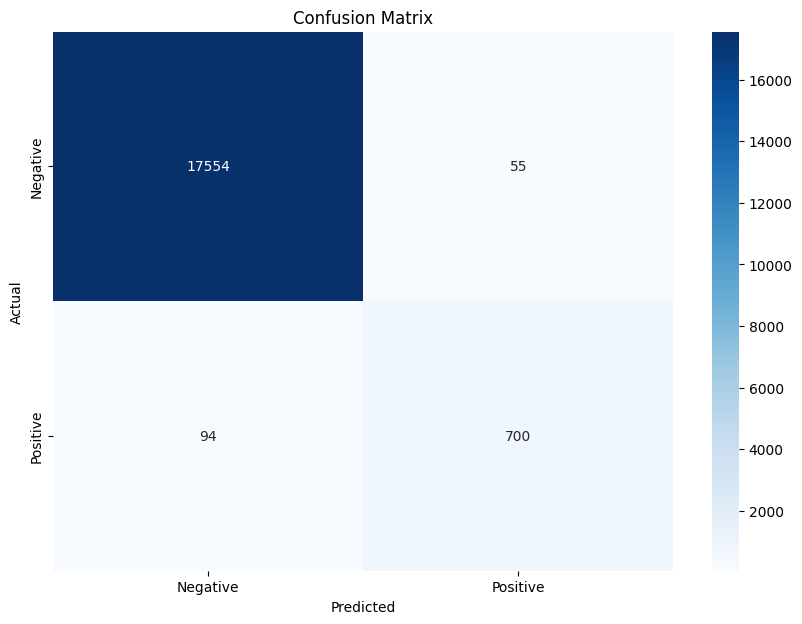

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Weighted F1 Score: {f1}")
print("Classification Report:")
print(report)

Test Accuracy: 0.9919034939955442
Weighted F1 Score: 0.9918060469973352
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17609
           1       0.93      0.88      0.90       794

    accuracy                           0.99     18403
   macro avg       0.96      0.94      0.95     18403
weighted avg       0.99      0.99      0.99     18403

